<a href="https://colab.research.google.com/github/yexf308/MAT592/blob/main/Module1/Logistic_regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


# Logistic regression: Perception

Logistic regression is a widely used discriminative classification model $p(y|\mathbf{x}; \theta)$, where $\mathbf{x}$ is a fixed-dimensional input vector, $y\in\{1,\dots, C\}$ in the **discrete** class label, and $\theta$ are the parameters. If $C=2$, this is known as **binary logistic regression** (we will use $C\in\{0,1\}$), and if $C>2$, it is known as multinomial
logistic regression, or alternatively, multiclass logistic regression. 

## Perceptron for binary logistic regression

Example: Input is the pixels of images, output is cat/dog.

Given an feature input $[x_1,x_2,\dots, x_d]\in \mathbb{R}^d$ (again we define $\mathbf{x}=[1, x_1, x_2, \dots, x_d ]$ and $w_0$ is the bias term), define the weight vector $\mathbf{w}=[w_0, w_1, \dots, w_d]^\top \in \mathbb{R}^d$, 
then we can define **pre-activation** $z=\mathbf{x}\mathbf{w}\in \mathbb{R}$. 

perceptron is the composition of linear model and binary step function: 

$$\phi(z)=\begin{cases} 1 (\text{class 1})& \text{if }  z>0 \\   0(\text{class 0}) & \text{otherwise}\end{cases} $$

$\phi$ is called activation function； weights $\mathbf{w}\in \mathbb{R}^{d+1}$, are model parameters. 

It is a model of a single neuron that can be used for two-class classification problems and provides the foundation for later developing much larger networks.

<img src="https://github.com/yexf308/MAT592/blob/main/image/perceptron.png?raw=true" width="600" />



Given a set of training samples $\{(\mathbf{x}^{(i)}, y^{(i)})\}_{i=1}^N$, 
 \begin{align}
 L_i(\mathbf{w})&=(y^{(i)} - \phi(\mathbf{x}^{(i)}\mathbf{w}) )^2 \\
  \text{arg}\min_{\mathbf{w}}\text{RSS}(\mathbf{w})&=  \text{arg}\min_{\mathbf{w}}\sum_{i=1}^N L_i(\mathbf{w}) \\
 \end{align}

Perceptron can not be learned by (sub)gradient methods because $L_i(\mathbf{w})$ is discontinuous and has zero gradient almost everywhere (piecewise constant). 
$$ \nabla L_i(\mathbf{w})=(\phi(\mathbf{x}^{(i)}\mathbf{w})-y^{(i)})\cdot \color{red}{(\phi'(\mathbf{x}^{(i)}\mathbf{w}))}\cdot \mathbf{x}^{(i)}$$ 
$\phi'(z)=0$ when $z\ne 0$ and doesn't exist at $z=0$. 

### Gradient descent method
Use the "fake" gradient, 
$$\mathbf{w} \leftarrow \mathbf{w}-\eta \sum_{i=1}^N\left( \phi(\mathbf{x}^{(i)}\mathbf{w})- y^{(i)}\right) \mathbf{x}^{(i)} $$

The intuitive interpretation: if the prediction is
correct, no change is made, otherwise we move the weights in a direction so as to make the correct answer more likely. 

### Stochastic Gradient descent 

In machine learning, we can use a technique that evaluates and updates the weights every iteration called **stochastic gradient descent** to minimize the error of a model on our training data. The model makes a prediction for a training instance, the error is calculated and the model is updated in order to reduce the error for the next prediction.

- Choose an initial vector of parameters $\mathbf{w}$ and learning rate $\mathbf{\eta}_t$.

- Repeat until an approximate minimum is obtained:



1.   Randomly shuffle examples in the training set and update $\eta_t$
2.   For $i=1,2, \dots, N$, do,  (this is one epoch and $\eta_t$ is constant)
 $$ \mathbf{w} \leftarrow \mathbf{w}-\eta_t \left( \phi(\mathbf{x}^{(i)}\mathbf{w})- y^{(i)}\right) \mathbf{x}^{(i)} $$


Although the theoretical rate of convergence of SGD is slower than batch GD (in particular, SGD has a sublinear convergence rate), in practice SGD is often faster, since the per-step time is much lower. To see why SGD can make faster progress than full batch GD, suppose we have a dataset consisting of a single example duplicated K times. Batch training will be (at least) K times slower than SGD, since it will waste time computing the gradient for the repeated examples. Even if there are no duplicates, batch training can be wasteful, since early on in training the parameters are not well estimated, so it is not worth carefully evaluating the gradient.

A sufficient condition for SGD to achieve convergence is if the learning rate schedule satisfies the Robbins-Monro conditions:
$$ \eta_t\rightarrow 0, \frac{\sum_{t=1}^\infty \eta_t^2}{\sum_{t=1}^\infty \eta_t}\rightarrow 0$$

Some examples of learning rate schedules are listed below:

- $\eta_t = \eta_i$ if $t_i\le t \le t_{i+1}$, piecewise constant

- $\eta_t= \eta_0\exp(-\lambda t)$, exponential decay

- $\eta_t=\eta_0(\beta t +1)^{-\alpha}$, polynomial decay



<img src="https://github.com/yexf308/MAT592/blob/main/image/SGD.png?raw=true" width="1000" />


<img src="https://github.com/yexf308/MAT592/blob/main/image/SGD_learning.png?raw=true" width="1200" />


In practice, you can try constant learning rate first and tune the learning rate graduatly. 


In [ ]:
# Make a prediction with weights
def predict(x, w):
	activation = w.dot(x)

	return 1.0 if activation >= 0.0 else 0.0


In [ ]:
# Estimate Perceptron weights using stochastic gradient descent, l_rate is a constant 
def train_weights(X, y, l_rate, n_epoch):
  n, m    = X.shape
  weights = zeros(m)
  for epoch in range(n_epoch):
    sum_error = 0;
    arr = np.arange(n)
    random.shuffle(arr)
    # this is one epoch
    for i in arr:
      prediction = predict(X[i,:], weights)
      error      = prediction - y[i]
      sum_error  = error**2 + sum_error
      if error !=0:
        weights = weights - l_rate * error * X[i,:]

    print('sum_error at ',epoch+1, 'epoch is ', sum_error)
    if sum_error == 0:
      break

  return weights


[[ 1.          2.7810836   2.550537  ]
 [ 1.          1.46548937  2.36212508]
 [ 1.          3.39656169  4.40029353]
 [ 1.          1.38807019  1.85022032]
 [ 1.          3.06407232  3.00530597]
 [ 1.          7.62753121  2.75926224]
 [ 1.          5.33244125  2.08862677]
 [ 1.          6.92259672  1.77106367]
 [ 1.          8.67541865 -0.24206865]
 [ 1.          7.67375647  3.50856301]]


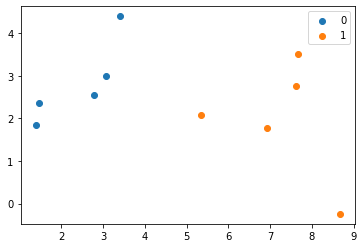

In [ ]:
dataset = array([[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]])
fig, ax = plt.subplots()
ax.scatter(dataset[0:5,0],dataset[0:5,1],label='0')
ax.scatter(dataset[5:10,0],dataset[5:10,1],label='1')
leg = ax.legend();

X = hstack([ones((dataset.shape[0],1)), dataset[:,0:2] ])
y = dataset[:,2]
print(X)



sum_error at  1 epoch is  3.0
sum_error at  2 epoch is  0.0
[-0.1         0.42232761 -0.50975949]


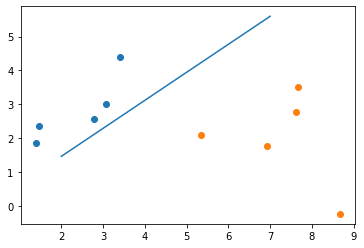

In [ ]:
l_rate = 0.1
n_epoch = 5
weights = train_weights(X, y, l_rate, n_epoch)
print(weights)

x_span = linspace(2,7,100)
y_span = -(weights[0] + weights[1] * x_span)/weights[2]
fig, ax = plt.subplots()
ax.scatter(dataset[0:5,0],dataset[0:5,1],label='0')
ax.scatter(dataset[5:10,0],dataset[5:10,1],label='1')
plot(x_span, y_span)

- Unlike gradient descent, perceptron algorithm does NOT always converge
since it uses fake `gradient'.

- however, it converges to the global minimum 0 (perfect classication),
when the training data is linearly separable. With the optimal $\mathbf{w}^*$ defines a hyperplane (decision boundary) separating the two classes. 

- In the HW, you will encounter some data sets that are not linearly separable. 

- the more general multi-layer perceptron compositing several linear and
non-linear functions, is the prototype of modern **deep neural networks**.
